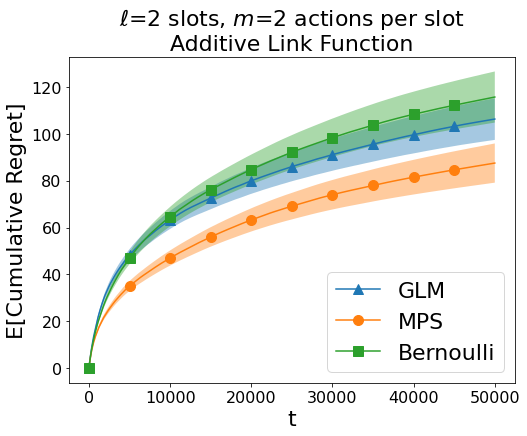

l=2 slots, m=2 actions per slot, additive link function: MPS is 17.67% better than GLM


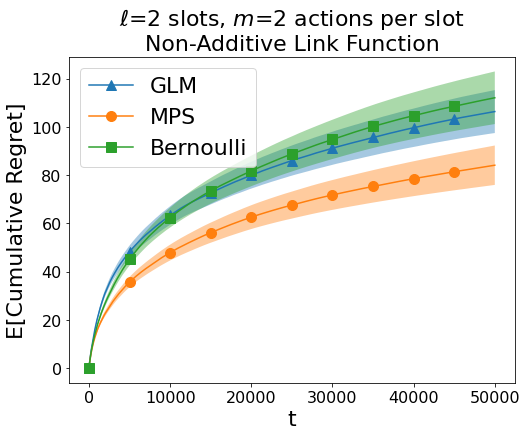

l=2 slots, m=2 actions per slot, non-additive link function: MPS is 20.91% better than GLM


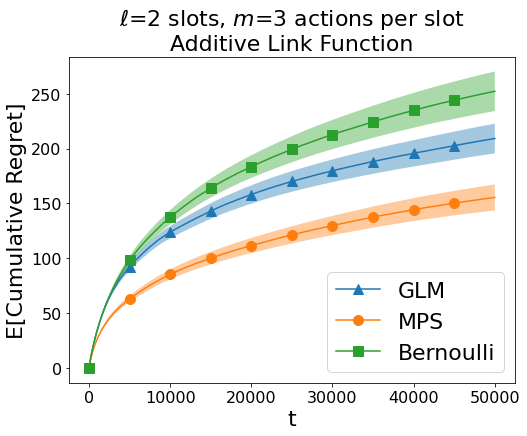

l=2 slots, m=3 actions per slot, additive link function: MPS is 25.68% better than GLM


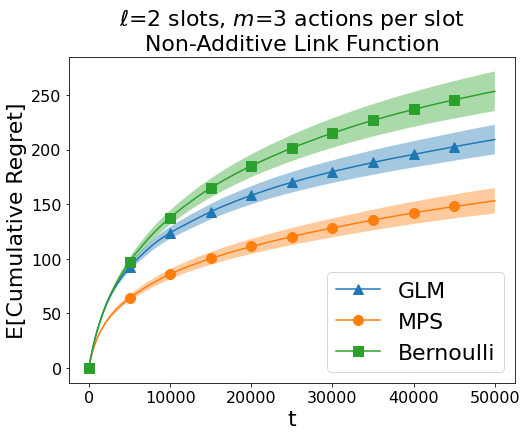

l=2 slots, m=3 actions per slot, non-additive link function: MPS is 26.77% better than GLM


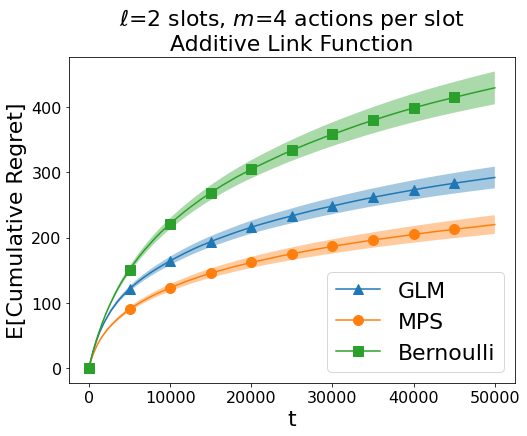

l=2 slots, m=4 actions per slot, additive link function: MPS is 24.72% better than GLM


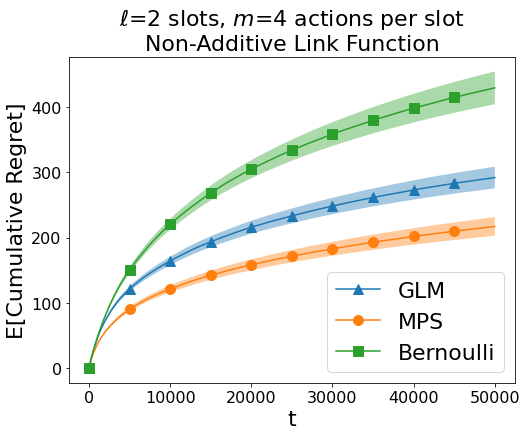

l=2 slots, m=4 actions per slot, non-additive link function: MPS is 25.67% better than GLM


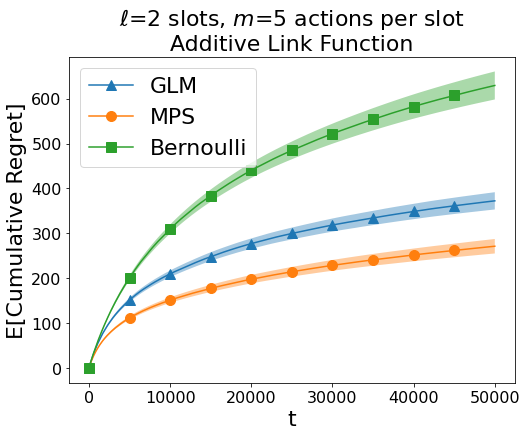

l=2 slots, m=5 actions per slot, additive link function: MPS is 27.15% better than GLM


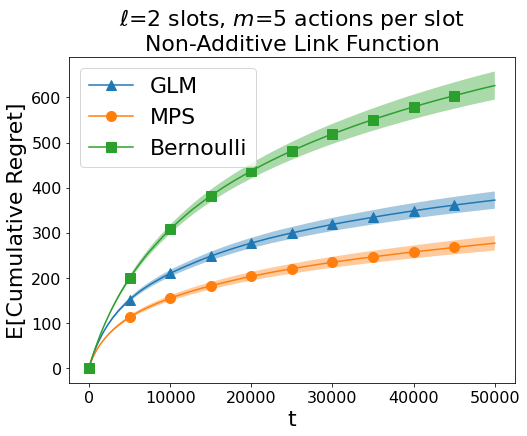

l=2 slots, m=5 actions per slot, non-additive link function: MPS is 25.66% better than GLM


In [1]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import os

horizon = 50000
simulation_count = 1000
regularization_parameter = 10
agent_types = ["LogisticRegressionTSAgent", "MarginalPosteriorTSAgent", "IndependentBernoulliArmsTSAgent"]
names = ["GLM", "MPS", "Bernoulli"]
markers = ['^', 'o', 's']

ell = 2
for m, add in product([2, 3, 4, 5], [True, False]):
  output_prefixes = ["SLOT{}LEVEL{}_ADD{}".format(ell, m, add)] * len(agent_types)
  
  try:
    filename = "Results/{}_{}_H{}_S{}{}".format(output_prefixes[1], agent_types[1], 
                                                horizon, simulation_count, "")
    regret = np.load("{}_Regret.npy".format(filename))
  except FileNotFoundError:
    continue
    
  fontsize=18
  fig = plt.figure(figsize=(8, 6))
  for i in range(len(agent_types)):
    agent_type = agent_types[i]
    output_prefix = output_prefixes[i]
    parameters = ""
    if ("LogisticRegressionTSAgent" in agent_type or "LogisticRegressionUCBAgent" in agent_type):
      parameters = "_R{}".format(regularization_parameter)
    filename = "Results/{}_{}_H{}_S{}{}".format(output_prefix, agent_type, horizon, simulation_count, 
                                                parameters)

    regret = np.load("{}_Regret.npy".format(filename))
    regret_sd = np.sqrt(np.load("{}_RegretVar.npy".format(filename)) / simulation_count)
    regret_low = regret - regret_sd
    regret_high = regret + regret_sd
    plt.plot(range(horizon), np.cumsum(regret), label=names[i], marker=markers[i], markersize=10, 
             markevery=5000)
    plt.fill_between(range(horizon), np.cumsum(regret_low), np.cumsum(regret_high), alpha=0.4)

  plt.xlabel('t', fontsize=22)
  plt.ylabel('E[Cumulative Regret]', fontsize=22)
  plt.legend(fontsize=22)
  plt.title(r"$\ell$={} slots, $m$={}".format(ell, m) + " actions per slot\n{}"
            .format("Additive Link Function" if add else "Non-Additive Link Function"), fontsize=22)
  plt.tick_params(labelsize=16)
  if not os.path.exists("Figures/"):
        os.makedirs("Figures/")
  plt.savefig("Figures/SLOT{}LEVEL{}_ADD{}.jpg".format(ell, m, add), dpi=200, bbox_inches='tight')
  plt.show()

  total_regret = []
  for i in range(len(agent_types)):
    agent_type = agent_types[i]
    output_prefix = output_prefixes[i]
    parameters = ""
    if ("LogisticRegressionTSAgent" in agent_type or "LogisticRegressionUCBAgent" in agent_type):
      parameters = "_R{}".format(regularization_parameter)
    filename = "Results/{}_{}_H{}_S{}{}".format(output_prefix, agent_type, horizon, simulation_count, 
                                                parameters)

    regret = np.load("{}_Regret.npy".format(filename))
    total_regret.append(np.sum(regret))
  print("l={} slots, m={} actions per slot, {} link function"
        .format(ell, m, "additive" if add else "non-additive") 
          + ": MPS is {}% better than GLM"
          .format(np.round(100 * (total_regret[0] - total_regret[1]) / total_regret[0], 2)))
  
  